In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error as MSE
from scipy.stats import spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy as hc
import scipy

Data Originally taken from UCI databases 
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work
Data downloaded onto OneDrive

In [2]:
df=pd.read_csv("C:/Users/User/OneDrive/Documents/Absenteeism-data.csv")
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Make a Checkpoint so initial dataframe is unaffected.

In [3]:
df1=df.copy()

In [4]:
df1=df1.drop('ID', axis=1)

In [5]:
df1.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


In [7]:
df1.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [8]:
# Convert date variable into a datetime stamp
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null datetime64[ns]
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.2 KB


#### Reasons for absence given in UCI website, https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [10]:
df1['Reason for Absence'].min()

0

In [11]:
df1['Reason for Absence'].max()

28

In [12]:
len(df1['Reason for Absence'].unique())

28

In [13]:
# Tells us that there must be a missing number as 28 reasons but min to max is 29. Sort data to find missing no.
sorted(df1['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

### Categorising reasons (Looking at UCI website there reasons 0-13 are diseases, 14-16 are pregnancy related, 17-21 are clinical related and 22-28 are non-clinical related) This means in theory that they can be grouped into 4 categories instead of the 28 

In [14]:
reasons_columns = pd.get_dummies(df1['Reason for Absence'], drop_first=True)

In [15]:
reasons_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
reason_type1=reasons_columns.loc[:,1:14].max(axis=1)
reason_type2=reasons_columns.loc[:,15:17].max(axis=1)
reason_type3=reasons_columns.loc[:,18:21].max(axis=1)
reason_type4=reasons_columns.loc[:,22:].max(axis=1)

In [17]:
reason_type1

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
670    0
671    0
672    1
673    0
674    0
675    0
676    0
677    1
678    0
679    1
680    0
681    1
682    0
683    0
684    0
685    0
686    1
687    0
688    0
689    0
690    0
691    0
692    1
693    1
694    0
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: uint8

# Merging DataFrames to include the Dummy reasons and remove initial Reason for absence columns

In [18]:
df1.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [19]:
df2 = pd.concat([df1, reason_type1, reason_type2, reason_type3, reason_type4], axis=1)
df2

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1
5,23,2015-07-10,179,51,38,239.554,31,1,0,0,2,0,0,0,1
6,22,2015-07-17,361,52,28,239.554,27,1,1,4,8,0,0,0,1
7,23,2015-07-24,260,50,36,239.554,23,1,4,0,4,0,0,0,1
8,19,2015-07-06,155,12,34,239.554,25,1,2,0,40,0,0,1,0
9,22,2015-07-13,235,11,37,239.554,29,3,1,1,8,0,0,0,1


### Want to Change column names

In [20]:
df2.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 0, 1, 2, 3], dtype=object)

In [21]:
Col_names = ['Reason for Absence','Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [22]:
df2.columns = Col_names

In [23]:
df2.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [24]:
df2.drop(['Reason for Absence'], axis =1).head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [25]:
col_names_reordered = [ 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours' ]

In [26]:
df2 = df2[col_names_reordered]

In [27]:
df2.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [28]:
df3 = df2.copy()

In [29]:
df3['Date'].head()

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
Name: Date, dtype: datetime64[ns]

In [30]:
list_months = []
for i in range(df3.shape[0]):
    list_months.append(df3['Date'][i].month)

In [31]:
len(list_months)

700

In [32]:
df3['Month'] = list_months

### Extract Day from Date

In [33]:
def date_to_day(date_value):
    return date_value.weekday()

In [34]:
df3['Day_of_the_week'] = df3['Date'].apply(date_to_day)

In [35]:
df3.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day_of_the_week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [36]:
df3.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month',
       'Day_of_the_week'], dtype=object)

In [37]:
col_names_reordered1 = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'Day_of_the_week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [38]:
df3 = df3[col_names_reordered1]

In [39]:
df3.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [40]:
list_years=[]
for i in range(df2.shape[0]):
    list_years.append(df2['Date'][i].year)
len(list_years)

700

In [41]:
df3['Year'] = list_years
df3['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: int64

In [42]:
df3.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Year'],
      dtype=object)

In [43]:
col_names_reordered2 = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df3 = df3[col_names_reordered2]

In [44]:
df3.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Year,Month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015,7,3,289,36,33,239.554,30,1,2,1,2


### Checkpoint

In [45]:
df3 = df3.copy()

### Education Variable

In [46]:
df3['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [47]:
df3['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [48]:
# As 85% or so of Education are of value 1 then all the others (2,3,4) are grouped together to form a binary variable 
df3['Education'] = df3['Education'].map({1:0, 2:1,3:1,4:1})

In [49]:
df3.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Year,Month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,2015,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,2015,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,2015,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,2015,7,3,289,36,33,239.554,30,0,2,1,2


In [50]:
df3['Body Mass Index'].value_counts().sum()

700

In [51]:
df3['Body Mass Index'].unique()

array([30, 31, 24, 27, 23, 25, 29, 32, 22, 33, 21, 28, 38, 19, 36, 35],
      dtype=int64)

In [52]:
df3['Obese'] = pd.cut(df3['Body Mass Index'], bins= [18,29,40], include_lowest=True, labels=['0', '1'])

In [53]:
df3.drop(['Body Mass Index'], axis=1).head()

,Reason_1,Reason_2,Reason_3,Reason_4,Year,Month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Education,Children,Pets,Absenteeism Time in Hours,Obese
0,0,0,0,1,2015,7,1,289,36,33,239.554,0,2,1,4,1
1,0,0,0,0,2015,7,1,118,13,50,239.554,0,1,0,0,1
2,0,0,0,1,2015,7,2,179,51,38,239.554,0,0,0,2,1
3,1,0,0,0,2015,7,3,279,5,39,239.554,0,2,0,4,0
4,0,0,0,1,2015,7,3,289,36,33,239.554,0,2,1,2,1


In [54]:
df3['Obese'].value_counts()

0    463
1    237
Name: Obese, dtype: int64

In [55]:
df3.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Obese'],
      dtype=object)

In [56]:
col_names_reordered3 = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Obese', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [57]:
df3 = df3[col_names_reordered3]

In [58]:
df3.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Year,Month,Day_of_the_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Obese,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015,7,1,289,36,33,239.554,1,0,2,1,4
1,0,0,0,0,2015,7,1,118,13,50,239.554,1,0,1,0,0
2,0,0,0,1,2015,7,2,179,51,38,239.554,1,0,0,0,2
3,1,0,0,0,2015,7,3,279,5,39,239.554,0,0,2,0,4
4,0,0,0,1,2015,7,3,289,36,33,239.554,1,0,2,1,2


In [59]:
numerical = [
  'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Absenteeism Time in Hours']
categorical = [
  'Year', 'Month', 'Day_of_the_week', 'Obese', 'Education', 'Children', 'Pets'
]

df4 = df3[numerical + categorical]
df4.shape

(700, 12)

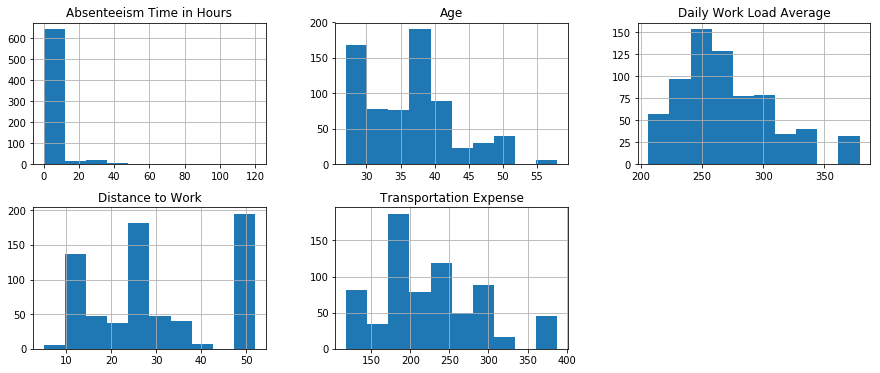

In [60]:
df4[numerical].hist(bins=10, figsize=(15,6), layout=(2,3));

Looks like Age, Daily Work Load and Transportation Expense are normally distributed, Distance to work has big peaks on right side and looks like there is an/are outlier(s) in the Absenteeism variable. Going to plot Absenteeism to see if outliers.

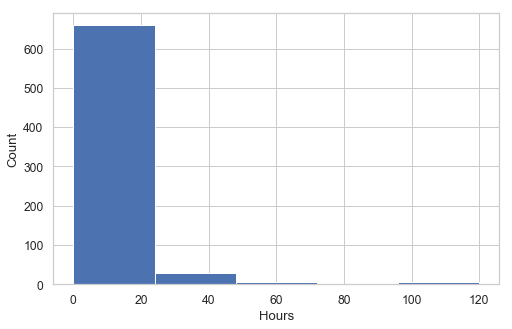

In [61]:
#results show that vast majority in 0-20 hours but few outliers out to 120 hours.
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df4['Absenteeism Time in Hours'], norm_hist=False,kde=False, bins=5, hist_kws={"alpha": 1}
).set(xlabel='Hours', ylabel='Count');

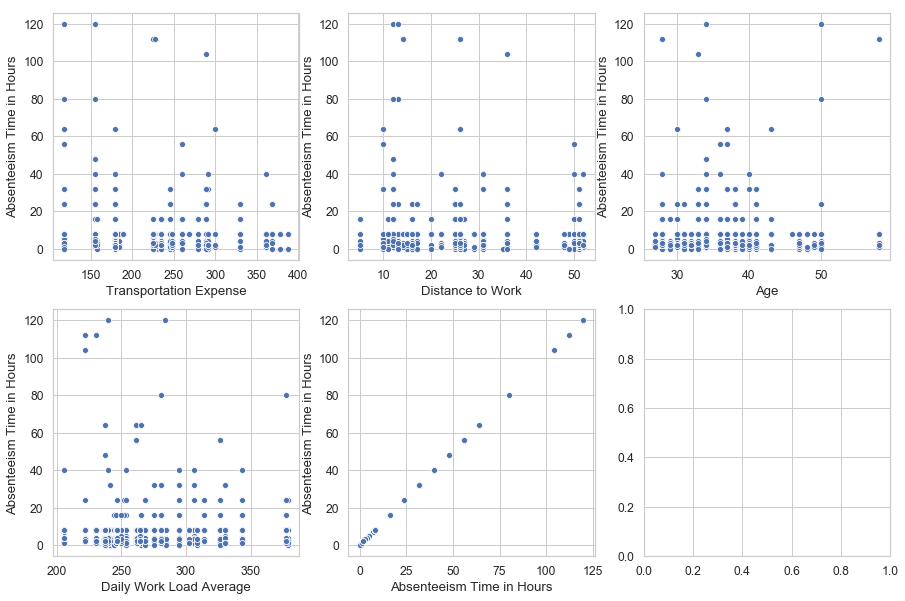

In [62]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for var, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=var, y='Absenteeism Time in Hours', data=df4, ax=subplot)
#Nothing seems to stand out here in terms of correlations

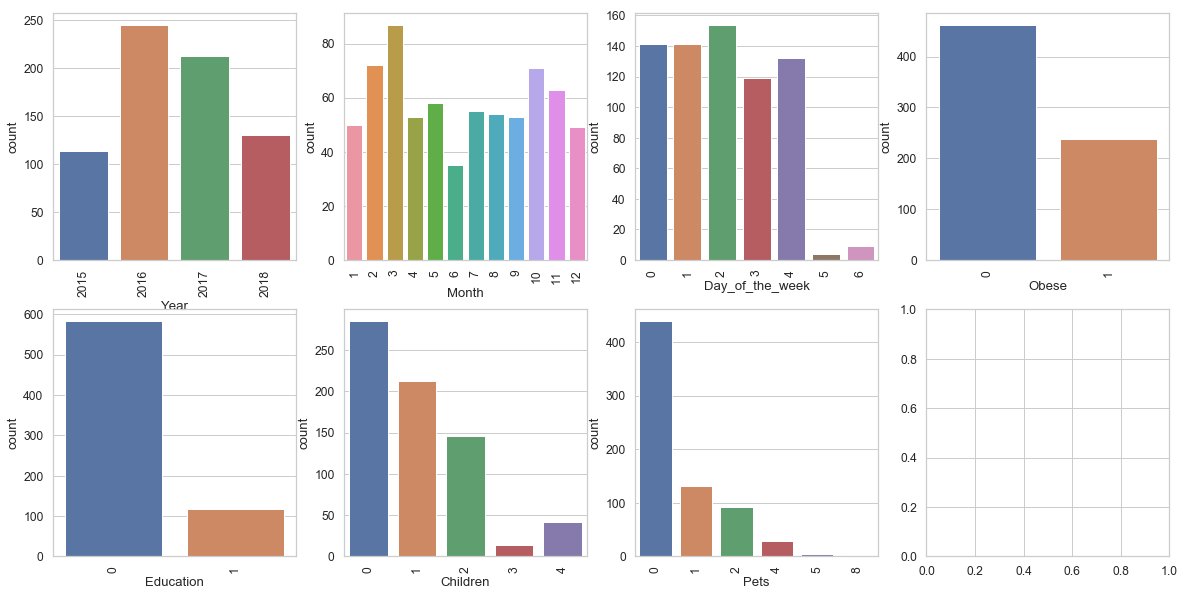

In [63]:
#Investigating Categorical Variables
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df4[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

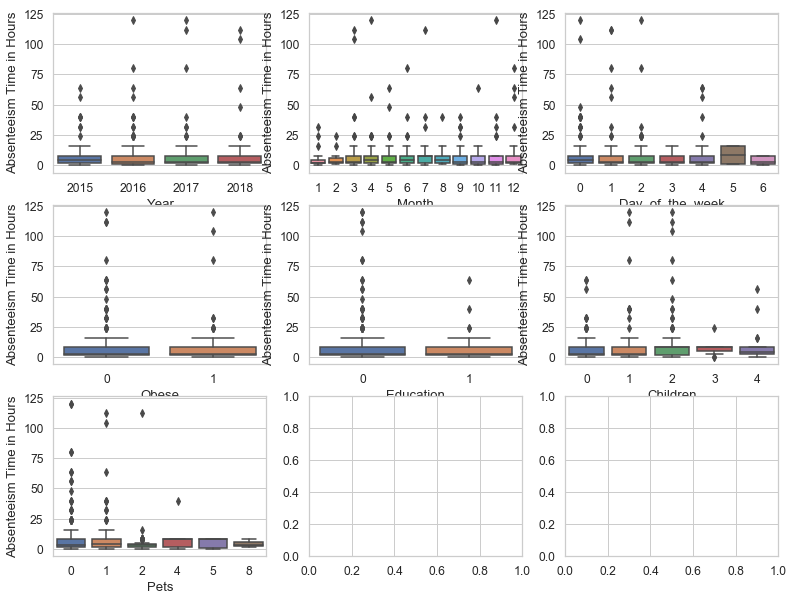

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(13, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Absenteeism Time in Hours', data=df4, ax=subplot)

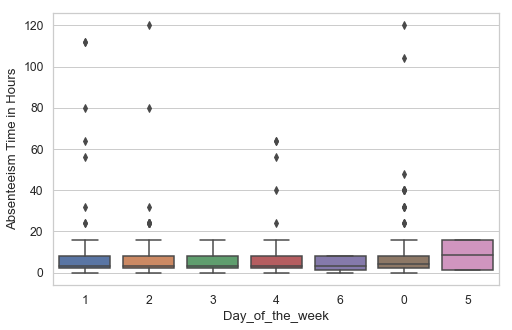

In [65]:
sorted_nb = df4.groupby(['Day_of_the_week'])['Absenteeism Time in Hours'].median().sort_values()
sns.boxplot(x=df4['Day_of_the_week'], y=df4['Absenteeism Time in Hours'], order=list(sorted_nb.index));
#No apparent differences between days of the week except possibly Day 5 i.e. Saturday but relatively few counts for this\\
#unlikely to be real differences.

In [66]:
sorted_nb.describe

<bound method NDFrame.describe of Day_of_the_week
1    3.0
2    3.0
3    3.0
4    3.0
6    3.0
0    4.0
5    8.5
Name: Absenteeism Time in Hours, dtype: float64>

### Looking at the reasons for absenteeism i.e. Reasons 1-4

In [67]:
Reasons = [
  'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Absenteeism Time in Hours']


df5 = df3[Reasons]
df5.shape

(700, 5)

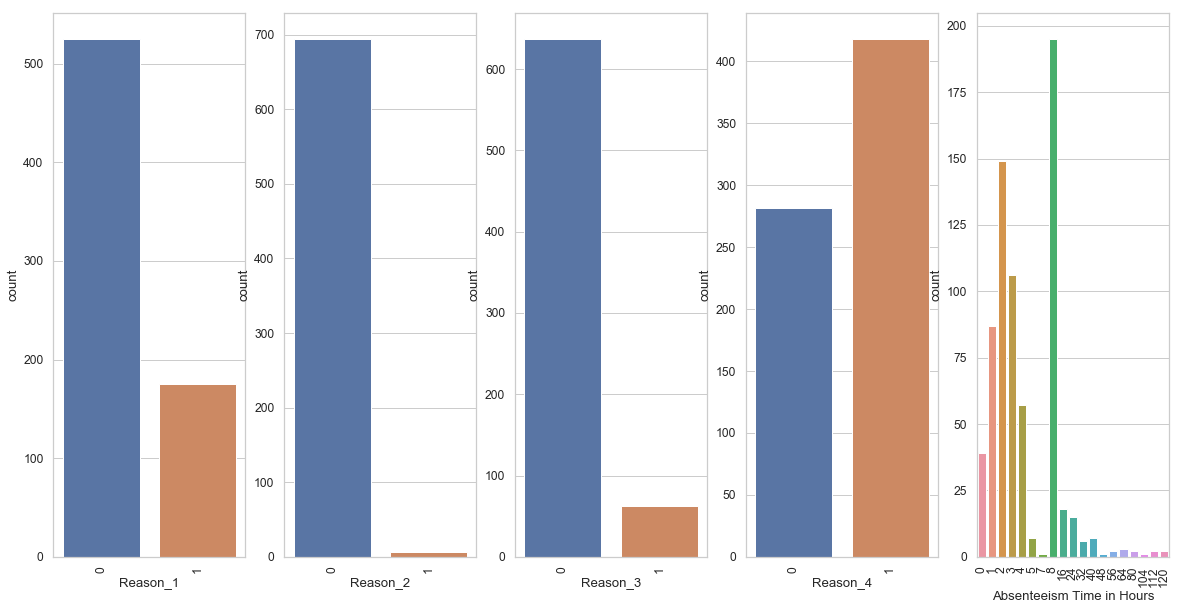

In [68]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for variable, subplot in zip(Reasons, ax.flatten()):
    sns.countplot(df5[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90);
#Shows that Reason 4 is most common reason for absenteeism i.e. sickness that doesn't require doctor and not disease
#Also shows that most abumndant number of hours is 8 i.e a whole day potentially can remove greater than 8 when analysing for days

In [69]:
df3.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Obese', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'],
      dtype='object')

In [70]:
df_features = df3[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Obese', 'Education', 'Children', 'Pets']]


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


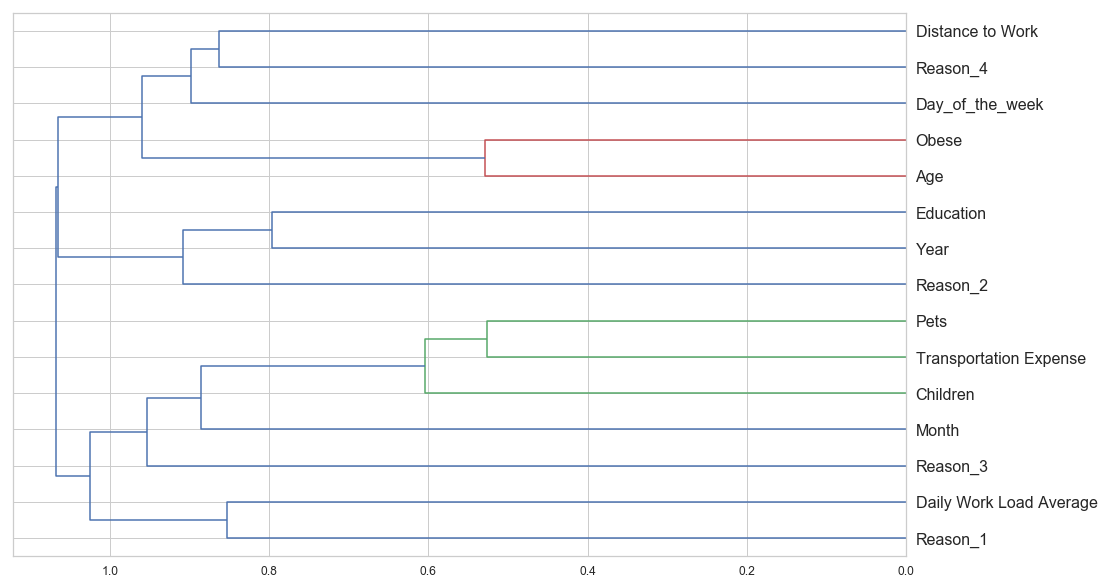

In [71]:
corr = np.round(scipy.stats.spearmanr(df_features).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_features.columns, orientation='left', leaf_font_size = 16)
plt.show()

In [72]:
X = df_features
y = df3['Absenteeism Time in Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [73]:
model = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [74]:
test_score = r2_score(y_test, y_pred)
spearman = spearmanr(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
rmse_test = MSE(y_test, y_pred) ** (1/2)

print(f'Out-of-bag score : {model.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test set of RMSE : {rmse_test:.2f}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag score : -0.00909
Test data R-2 score: -0.211
Test set of RMSE : 13.93
Test data Spearman correlation: 0.649
Test data Pearson correlation: 0.344


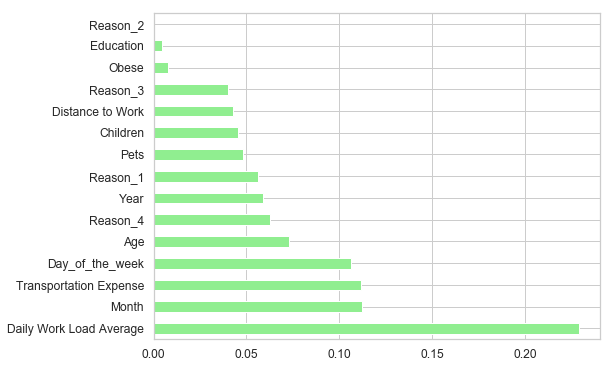

In [75]:
#Out of the bag score close to 0 suggests rubbish initial classification (means regression isn't working)
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='lightgreen'))
plt.show()

### Nothing seems to be standing out from a linear regression perspective (investigate Classification instead)

In [76]:
abs_bins = [0, 4, 8, 16, np.inf]
abs_names = ['<4', '8', '16', '16+']
df3['abs_range'] = pd.cut(df3['Absenteeism Time in Hours'], abs_bins, labels=abs_names).astype(str)


In [77]:
X = df_features
y = df3['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)


### Try RandomForestClassifier and iterate to try and improve accuracy

In [78]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6857142857142857


In [80]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         16       0.00      0.00      0.00         7
        16+       0.25      0.11      0.15         9
          8       0.57      0.65      0.61        55
         <4       0.79      0.78      0.79        97
        nan       0.78      1.00      0.88         7

avg / total       0.66      0.69      0.67       175



In [81]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=24, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=24, refit=True,
          return_train_score='warn', s

In [96]:
#That took a long time
rf_random.best_params_

{'n_estimators': 1700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [83]:
from sklearn.ensemble import RandomForestClassifier
model_random = rf_random.best_estimator_
model_random.fit(X_train, y_train)
predictions_random = model_random.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_random))

Accuracy: 0.7085714285714285


In [85]:
print(classification_report(y_test, predictions_random))


             precision    recall  f1-score   support

         16       0.00      0.00      0.00         7
        16+       0.25      0.11      0.15         9
          8       0.59      0.69      0.64        55
         <4       0.81      0.80      0.81        97
        nan       0.78      1.00      0.88         7

avg / total       0.68      0.71      0.69       175



In [97]:
metrics.f1_score(y_test, predictions_random, average='micro')
#Gradually improving predictions

0.7085714285714285

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
    
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, n_jobs = -1, error_score=np.nan, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score=nan,
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12, 14], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 4], 'min_samples_split': [7, 10, 12], 'n_estimators': [250, 275, 300, 325]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [88]:
#Took a lot less time than Randomised CV method did
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 275}

In [89]:
from sklearn.ensemble import RandomForestClassifier
model_grid = grid_search.best_estimator_
model_grid.fit(X_train, y_train)
predictions_grid = model_grid.predict(X_test)

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_grid))

Accuracy: 0.7028571428571428


In [91]:
print(classification_report(y_test, predictions_grid))

             precision    recall  f1-score   support

         16       0.00      0.00      0.00         7
        16+       0.00      0.00      0.00         9
          8       0.56      0.78      0.65        55
         <4       0.84      0.78      0.81        97
        nan       0.67      0.57      0.62         7

avg / total       0.67      0.70      0.68       175



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
df3.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Year', 'Month',
       'Day_of_the_week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Obese', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'abs_range'], dtype=object)

In [93]:
model_grid.feature_importances_

array([0.09516256, 0.        , 0.05390056, 0.24170421, 0.03130975,
       0.05523758, 0.05227181, 0.13012913, 0.07119337, 0.07767954,
       0.07175544, 0.01674057, 0.00904214, 0.05373885, 0.04013449])

In [94]:
feature_imp = pd.Series(model_grid.feature_importances_,index=df_features.columns).sort_values(ascending=False)
feature_imp

Reason_4                   0.241704
Transportation Expense     0.130129
Reason_1                   0.095163
Age                        0.077680
Daily Work Load Average    0.071755
Distance to Work           0.071193
Month                      0.055238
Reason_3                   0.053901
Children                   0.053739
Day_of_the_week            0.052272
Pets                       0.040134
Year                       0.031310
Obese                      0.016741
Education                  0.009042
Reason_2                   0.000000
dtype: float64

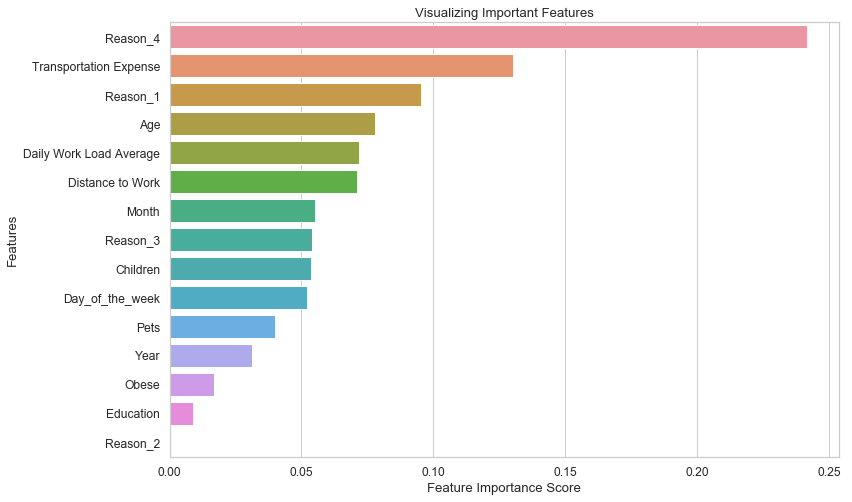

In [95]:
fig=plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

### Reasons given in UCI database
Reasons given 
0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}

## In Chart and analysis above, Reason 4 is combination of Reasons 22-28 (in UCI database), Reason 1 is combination of combination of Reasons 1-14 (UCI Database).